### Dữ liệu sử dụng: Dữ liệu review về thực phẩm 
Link dataset: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

### Import thư viện

In [1]:
import os
print(os.listdir("/kaggle/input/amazon-fine-food-reviews"))
# Ignore  the warnings
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore') 
# data visualisation and manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
# sets matplotlib to inline and displays graphs belo w the corressponding cell. 
% matplotlib inline   
style.use('fivethirtyeight') 
sns.set(style='whitegrid',color_codes=True) 
#nltk 
import nltk 
#preprocessing 
from nltk.corpus import stopwords  #stopwords 
from nltk import word_tokenize,sent_tokenize # tokenizing 
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others from nltk.stem.snowball import SnowballStemmer from nltk.stem import WordNetLemmatizer  # lammatiz er from WordNet 
# for part-of-speech tagging
from nltk import pos_tag 
# for named entity recognition (NER) 
from nltk import ne_chunk 
# vectorizers for creating the document-term-matrix (DTM) 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
# BeautifulSoup libraray 
from bs4 import BeautifulSoup  
import re 
# Model_selection 
from sklearn.model_selection import train_test_split,cross_validate 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
#evaluation 
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report 
from mlxtend.plotting import plot_confusion_matrix 
#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder 
#classifiaction. 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC,SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB 
#stop-words 
stop_words=set(nltk.corpus.stopwords.words('english')) 
#keras
import keras 
from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Input,CuDNNLSTM,LSTM 
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence
#gensim word2vec 
from gensim.models import Word2Vec

['hashes.txt', 'Reviews.csv', 'database.sqlite']


UsageError: Line magic function `%` not found.


### EDA

In [2]:
review_df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv") 

In [3]:
review_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
review_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
df = review_df[['Text','Score']] 
df['review']=review_df['Text'] 
df['rating']=review_df['Score']
df.drop(['Text','Score'],axis=1,inplace=True)
print(df.shape)
df.head() 

(568454, 2)


,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [6]:
print(df['rating'].isnull().sum())
df['review'].isnull().sum() 

0


0

#### Xóa dòng bị trùng

In [7]:
df.drop_duplicates(subset=['rating','review'],keep='first',inplace=True)  

In [8]:
print(df.shape)
df.head() 

(393675, 2)


,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [9]:
for review in df['review'][:5]: 
    print(review+'\n'+'\n')

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


If you are looking for the se

#### Tạo class

Vì lý do dữ liệu là ở dạng rating từ 1 - 5. Vì vậy ta sẽ cho threshhold là 0 - 3 là `negative`. > 3 là `positive`

In [10]:
def sentiment_threshold(rating):  
    if(rating<=3):    
        return 0  
    else:   
        return 1 

df['sentiment']=df['rating'].apply(sentiment_threshold) 

In [11]:
df.drop(['rating'],axis=1,inplace=True) 
df.head() 

,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [12]:
df['sentiment'].value_counts() 

sentiment
1    306819
0     86856
Name: count, dtype: int64

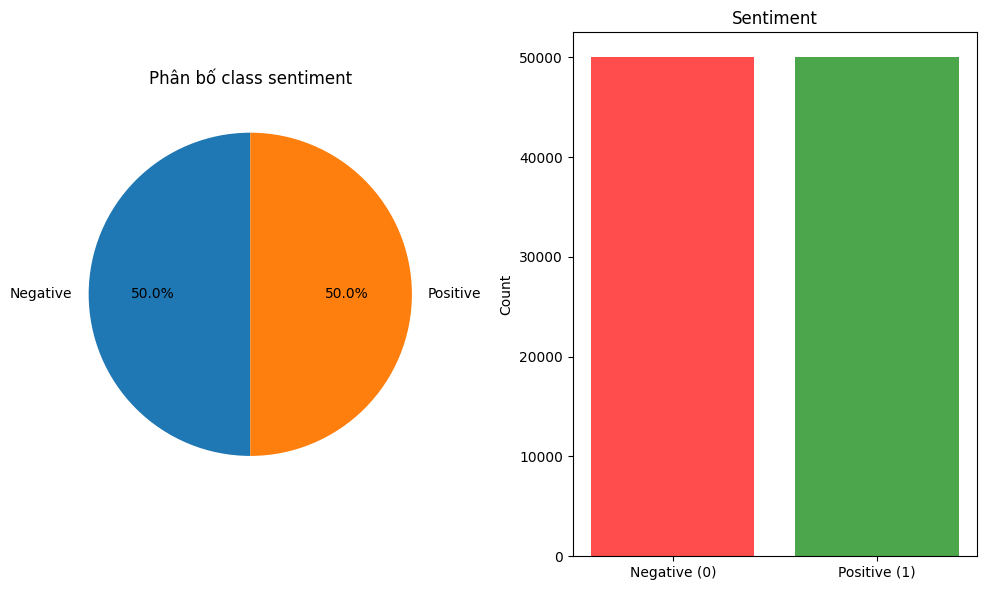

In [53]:
plt.figure(figsize=(10, 6))

# Pie chart
plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
plt.title('Phân bố class sentiment')

# Bar chart
plt.subplot(1, 2, 2)
plt.bar(['Negative (0)', 'Positive (1)'], sentiment_counts.values, color=['red', 'green'], alpha=0.7)
plt.title('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Tiền xử lý dữ liệu

Nhóm tham khảo từ các nguồn:  
- [Text Preprocessing in NLP – Viblo](https://viblo.asia/p/text-preprocessing-in-nlp-38X4E9j24N2)  
- [Text Preprocessing – Kaggle Notebook](https://www.kaggle.com/code/abdmental01/text-preprocessing-nlp-steps-to-process-text)  

**Bước 1. Xóa thẻ HTML**  
Sử dụng `BeautifulSoup` để loại bỏ các thẻ HTML, chỉ giữ lại phần nội dung văn bản.

**Bước 2. Chuẩn hóa contraction** 
Một số từ viết tắt như `don't`, `can't`, `i'm` sẽ được mở rộng thành  
`do not`, `cannot`, `i am` nhằm giúp mô hình hiểu rõ hơn.

**Bước 3. Lọc ký tự**  
Chỉ giữ lại các ký tự chữ cái và dấu nháy đơn `'`.  
Các ký tự đặc biệt, số, dấu câu sẽ bị loại bỏ.

**Bước 4. Chuẩn hóa chữ thường và tách từ**  
Chuyển toàn bộ văn bản về chữ thường và tách thành danh sách từ.

**Bước 5. Xóa stopwords và lemmatization**  
- Stopwords: loại bỏ những từ ít ý nghĩa như `a`, `an`, `the`, ...  
- Lemmatization: đưa từ về dạng gốc.  
  Ví dụ: `"running" thành "run"`, `"dogs" thành "dog"`.
  
**Bước 6. Gộp lại thành chuỗi**  
Sau khi xử lý, danh sách từ sẽ được nối lại thành văn bản sạch để đưa vào mô hình.

In [13]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Bảng chuyển đổi contraction
CONTRACTIONS_MAP = {
    "don't":"do not",
    "can't":"cannot",
    "i'm":"i am",
    "it's":"it is",
    "you're":"you are",
    "they're":"they are"
    # có thể mở rộng thêm...
}

def normalize_contractions(text):
    for k, v in CONTRACTIONS_MAP.items():
        text = re.sub(r"\b"+re.escape(k)+r"\b", v, text, flags=re.IGNORECASE)
    return text

def clean_reviews(review):
    # 1. Xóa thẻ HTML
    review_text = BeautifulSoup(review, "lxml").get_text(separator=" ")
    # 2. Chuẩn hóa contraction
    review_text = normalize_contractions(review_text)
    # 3. Giữ lại chữ cái + dấu nháy đơn
    review_text = re.sub("[^a-zA-Z']+", " ", review_text)
    # 4. Chuyển về chữ thường và tách từ
    tokens = review_text.lower().split()
    # 5. Xóa stopwords và lemmatize
    le = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    tokens = [le.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 1]
    # 6. Ghép lại thành chuỗi
    return " ".join(tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Căn bằng dữ liệu

In [14]:
pos_df=df.loc[df.sentiment==1,:][:50000] 
neg_df=df.loc[df.sentiment==0,:][:50000]

In [15]:
pos_df.head()

,review,sentiment
0,I have bought several of the Vitality canned d...,1
2,This is a confection that has been around a fe...,1
4,Great taffy at a great price. There was a wid...,1
5,I got a wild hair for taffy and ordered this f...,1
6,This saltwater taffy had great flavors and was...,1


In [16]:
neg_df.head() 

,review,sentiment
1,Product arrived labeled as Jumbo Salted Peanut...,0
3,If you are looking for the secret ingredient i...,0
12,My cats have been happily eating Felidae Plati...,0
16,I love eating them and they are good for watch...,0
26,"The candy is just red , No flavor . Just plan...",0


#### Gộp lại thành 1 dataset

In [17]:
df=pd.concat([pos_df,neg_df],ignore_index=True) 
print(df.shape)
df.head() 

(100000, 2)


,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,This is a confection that has been around a fe...,1
2,Great taffy at a great price. There was a wid...,1
3,I got a wild hair for taffy and ordered this f...,1
4,This saltwater taffy had great flavors and was...,1


### Random lại các hàng

In [18]:
df = df.sample(frac=1).reset_index(drop=True) 
print(df.shape) 
df.head()

(100000, 2)


,review,sentiment
0,If you're a fan of Green Tea flavored with Hon...,1
1,Perfectly ground Himalayan salt or pink salt. ...,1
2,"Really light even color, no gray pieces or unh...",1
3,My first impression of these cashews was that ...,1
4,Satisfying.<br /><br />I love that this chocol...,1


#### Áp dụng tiền xử lý dữ liệu văn bản

In [19]:
df['clean'] = df['review'].astype(str).apply(clean_reviews)
df['tokens'] = df['clean'].apply(lambda x: x.split())


In [20]:
df.head()


,review,sentiment,clean,tokens
0,If you're a fan of Green Tea flavored with Hon...,1,fan green tea flavored honey love new single s...,"[fan, green, tea, flavored, honey, love, new, ..."
1,Perfectly ground Himalayan salt or pink salt. ...,1,perfectly ground himalayan salt pink salt reco...,"[perfectly, ground, himalayan, salt, pink, sal..."
2,"Really light even color, no gray pieces or unh...",1,really light even color gray piece unhulled oa...,"[really, light, even, color, gray, piece, unhu..."
3,My first impression of these cashews was that ...,1,first impression cashew salty sea salt stronge...,"[first, impression, cashew, salty, sea, salt, ..."
4,Satisfying.<br /><br />I love that this chocol...,1,satisfying love chocolate organic first last i...,"[satisfying, love, chocolate, organic, first, ..."


#### Vector hóa dữ liệu văn bản

Trong NLP, để máy tính có thể hiểu được dữ liệu văn bản thì ta cần bước vector hóa. Từ đó vector này sẽ được đưa vào các mô hình mà ta xây dựng. Vector sẽ được dùng cho 

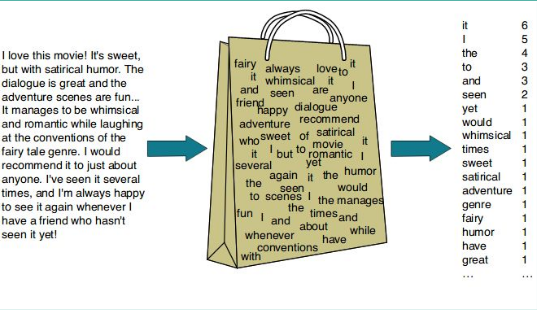

Minh họa quá trình vector hóa văn bản.

Có khả nhiều kỹ thuật khác như TF-IDF, BM25, Word2Vec. 

Với bài toán đề ra, để đạt hiệu quả cao, nhóm đã thử nghiệm và trong đó nhóm sử dụng `BAAI/bge-m3` cho `Decision Tree` và `KMean` và `Word2Vec` cho `LSTM`
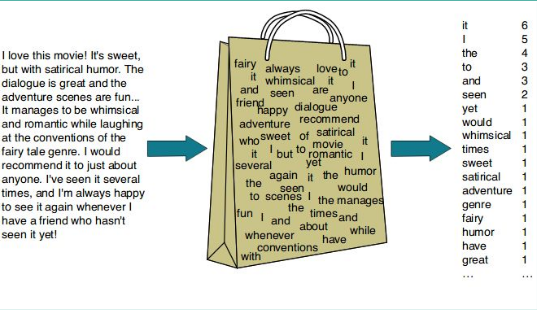

In [21]:
!pip install -qU sentence_transformers langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 8.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 57.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:

In [22]:
import torch
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Using device: {device}")

# Cấu hình embeddings
model_name = "BAAI/bge-m3"
model_kwargs = {"device": device}
encode_kwargs = {"normalize_embeddings": True}

text_embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

Using device: cuda


/tmp/ipykernel_36/875152069.py:16: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  text_embeddings = HuggingFaceBgeEmbeddings(
2025-09-24 16:03:05.885778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758729786.236015      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758729786.331838      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when on

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [23]:
text = "This is a test document."

In [24]:
query_result = text_embeddings.embed_query(text)

In [25]:
print(len(query_result))

1024


Kích thước vector là `1024`

Ngoài ra, vector còn cho ta biết mức độ tương đồng giữa 2 câu

In [26]:
from numpy import dot
from numpy.linalg import norm

q1 = "This is my dog"
q2 = "Charlie's dog is the big one"

q1_vec = text_embeddings.embed_query(q1)
q2_vec = text_embeddings.embed_query(q2)

cosine_similarity = dot(q1_vec, q2_vec) / (
    norm(q1_vec) * norm(q2_vec)
)

In [27]:
print(cosine_similarity)

0.743410336051948


#### Tạo đặc trưng bằng embedding 2048 (dùng `text_embeddings.embed_documents`)
Dùng embedding vector (size = 2048) cho Decision Tree và KMeans.
Lưu ý: nếu `text_embeddings` là API/từ package mà bạn có, gọi `embed_documents(list_of_texts)`

In [28]:
is_embed = False  # Nếu embed rồi thì thôi, khoải embed nữa,

In [29]:
import numpy as np
import os
from tqdm import tqdm

npy_path = "X_emb.npy"
batch_size = 512

texts = df['clean'].tolist()

def embed_in_batches(texts, batch_size=512):
    embeddings = []
    n_batches = (len(texts) + batch_size - 1) // batch_size
    for i in tqdm(range(0, len(texts), batch_size), total=n_batches, desc="Embedding"):
        batch = texts[i:i+batch_size]
        batch_emb = text_embeddings.embed_documents(batch)
        embeddings.extend(batch_emb)
    return np.array(embeddings)

if is_embed or not os.path.exists(npy_path):
    print("Embedding documents in batches...")
    X_emb = embed_in_batches(texts, batch_size=batch_size)
    np.save(npy_path, X_emb)
    print("Saved embeddings:", X_emb.shape)
else:
    print("Loading embeddings from file...")
    X_emb = np.load(npy_path)
    print("Loaded embeddings:", X_emb.shape)

Loading embeddings from file...
Loaded embeddings: (100000, 1024)


### Mô hình LSTM

In [50]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")


TensorFlow version: 2.18.0
Libraries imported successfully!


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_temp, y_train, y_temp = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)



In [63]:
MAX_FEATURES = 10000  
MAX_LENGTH = 100     
EMBEDDING_DIM = 128   

tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Training sequences shape: {X_train_pad.shape}")
print(f"Validation sequences shape: {X_val_pad.shape}")
print(f"Test sequences shape: {X_test_pad.shape}")

print(f"Sequences longer than {MAX_LENGTH}: {sum(1 for x in seq_lengths if x > MAX_LENGTH)} ({sum(1 for x in seq_lengths if x > MAX_LENGTH)/len(seq_lengths)*100:.1f}%)")


Vocabulary size: 47327
Training sequences shape: (70000, 100)
Validation sequences shape: (15000, 100)
Test sequences shape: (15000, 100)
Sequences longer than 100: 4453 (6.4%)


In [69]:
model = Sequential([
    Embedding(input_dim=MAX_FEATURES, 
              output_dim=EMBEDDING_DIM, 
              input_length=MAX_LENGTH, 
              mask_zero=True),
    SpatialDropout1D(0.2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.build(input_shape=(None, MAX_LENGTH))
print("Model Architecture:")
model.summary()

Model Architecture:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_9             │ (None, 100, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,463,105 (5.58 MB)

 Trainable params: 1,463,105 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = model.fit(
    X_train_pad, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_val_pad, y_val),
    verbose=1
)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 680s 610ms/step - accuracy: 0.7761 - loss: 0.4757 - val_accuracy: 0.8372 - val_loss: 0.3675
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 666s 609ms/step - accuracy: 0.8599 - loss: 0.3431 - val_accuracy: 0.8475 - val_loss: 0.3533
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 661s 604ms/step - accuracy: 0.8728 - loss: 0.3093 - val_accuracy: 0.8495 - val_loss: 0.3548
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 663s 606ms/step - accuracy: 0.8897 - loss: 0.2747 - val_accuracy: 0.8457 - val_loss: 0.3584
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 662s 605ms/step - accuracy: 0.9008 - loss: 0.2459 - val_accuracy: 0.8445 - val_loss: 0.3756
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 664s 607ms/step - accuracy: 0.9121 - loss: 0.2200 - val_accuracy: 0.8449 - val_loss: 0.4045
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 666s 609ms/step - accuracy: 0.9208 - loss: 0.1981 - val_accuracy: 0.8401 - val_loss: 0.4484
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 661s 605ms/step - ac

In [72]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [71]:
model.save("lstm_text_classifier.h5")

### Đánh giá

469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 106ms/step
Accuracy: 0.824

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      7500
           1       0.83      0.81      0.82      7500

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



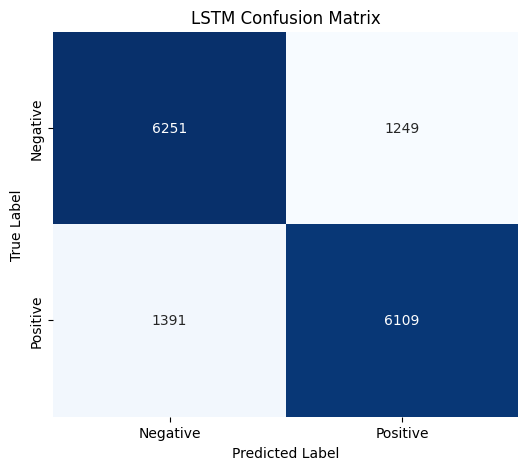

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate on test set
y_pred_probs = model.predict(X_test_pad)       # probabilities
y_pred = (y_pred_probs > 0.5).astype(int).ravel()  # threshold at 0.5
y_true = y_test  # <-- make sure you kept this from your split

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], 
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Confusion Matrix")
plt.show()

### Inferent mô hình

In [74]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = load_model("lstm_text_classifier.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

sample_sentence = ["This movie was absolutely a shit, worst!"]
sample_seq = tokenizer.texts_to_sequences(sample_sentence)
sample_pad = pad_sequences(sample_seq, maxlen=MAX_LENGTH, padding="post", truncating="post")

prediction = model.predict(sample_pad)
print(f"Prediction score: {prediction[0][0]:.4f}")
print("Predicted label:", "Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction score: 0.0069
Predicted label: Negative


### Naive Bayes

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [78]:
X = X_emb   # shape: (100000, 1024)
y = df['sentiment'].values  # 0 = negative, 1 = positive

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (85000, 1024) (85000,)
Test shape: (15000, 1024) (15000,)


Naive Bayes Results
Accuracy: 0.5050666666666667
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      7500
           1       0.51      0.49      0.50      7500

    accuracy                           0.51     15000
   macro avg       0.51      0.51      0.50     15000
weighted avg       0.51      0.51      0.50     15000



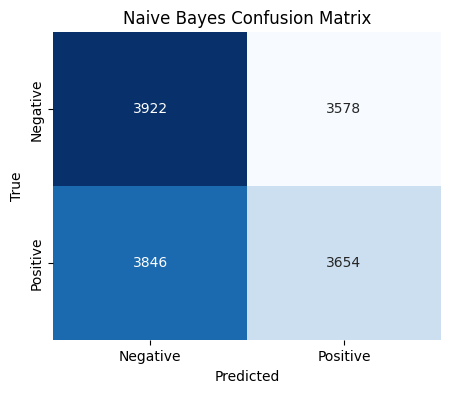

In [79]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Decision tree

In [80]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=30)  
dt_model.fit(X_train, y_train)

Decision Tree Results
Accuracy: 0.498
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      7500
           1       0.50      0.48      0.49      7500

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



NameError: name 'cm_dt' is not defined

<Figure size 500x400 with 0 Axes>

Decision Tree Results
Accuracy: 0.498
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      7500
           1       0.50      0.48      0.49      7500

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



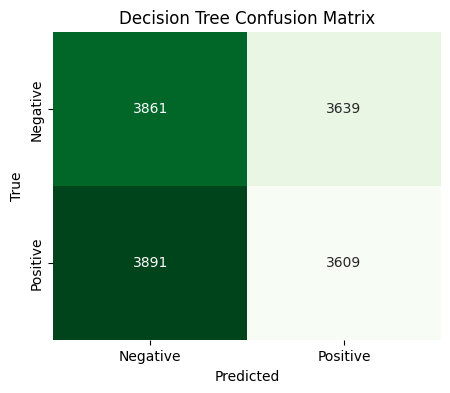

In [82]:
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Greens", cbar=False,
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Báo cáo so sánh mô hình phân loại cảm xúc

## Giới thiệu  

Bài toán được thực hiện nhằm phân loại cảm xúc tích cực hay tiêu cực từ tập dữ liệu gồm 100.000 mẫu review. Mỗi review được gán nhãn `0` (tiêu cực) hoặc `1` (tích cực).  

Trong nghiên cứu này, chúng tôi tiến hành so sánh ba mô hình: **Naive Bayes**, **Decision Tree**, và **Word2Vec + LSTM**. Hai mô hình đầu thuộc nhóm thuật toán học máy truyền thống, trong khi mô hình cuối thuộc nhóm học sâu, có khả năng khai thác đặc trưng ngữ nghĩa và ngữ cảnh tốt hơn.  

---

## Kết quả của Naive Bayes  

Mô hình Naive Bayes, cụ thể là **GaussianNB**, đạt được độ chính xác khoảng **50.5%**. Các chỉ số precision, recall và f1-score đều xấp xỉ 0.50 cho cả hai lớp.  

Điều này cho thấy mô hình chỉ hoạt động gần như ngẫu nhiên, không thực sự tận dụng được đặc trưng embeddings kích thước 1024 chiều. Naive Bayes thường phù hợp với dữ liệu dạng rời rạc như bag-of-words, hơn là dữ liệu embeddings liên tục.  

---

## Kết quả của Decision Tree  

Mô hình Decision Tree đạt độ chính xác khoảng **49.8%**, tức còn thấp hơn Naive Bayes. Các chỉ số precision, recall và f1-score đều quanh mức 0.50.  

Nguyên nhân có thể do Decision Tree khó khăn trong việc phân chia dữ liệu embeddings có không gian chiều cao và phân bố phức tạp. Cây quyết định thường có xu hướng quá khớp, và với loại đặc trưng này, khả năng tổng quát hóa gần như bằng ngẫu nhiên.  

---

## Kết quả của Word2Vec + LSTM  

Trái ngược với hai mô hình truyền thống, mô hình Word2Vec + LSTM cho kết quả **vượt trội**, với độ chính xác khoảng **82.4%**.  

Các chỉ số precision và recall dao động trong khoảng 0.81–0.83, f1-score đạt khoảng 0.82. Điều này chứng tỏ mô hình học sâu có khả năng khai thác tốt thông tin ngữ cảnh và cấu trúc tuần tự trong chuỗi từ, giúp nâng cao hiệu quả phân loại cảm xúc.  

---

## So sánh tổng quan  

Khi đặt ba mô hình cạnh nhau, có thể thấy sự khác biệt rõ rệt. Naive Bayes và Decision Tree đều cho kết quả ở mức ngẫu nhiên, không đem lại hiệu quả thực tiễn. Trong khi đó, LSTM đạt hiệu suất cao và ổn định.  

| Mô hình        | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
| Naive Bayes    | 0.505    | ~0.50     | ~0.50  | ~0.50    |
| Decision Tree  | 0.498    | ~0.50     | ~0.50  | ~0.50    |
| Word2Vec+LSTM  | 0.824    | ~0.83     | ~0.82  | ~0.82    |

---

## Kết luận  

Qua thực nghiệm, có thể khẳng định rằng các mô hình học máy truyền thống như Naive Bayes và Decision Tree **không phù hợp để khai thác embeddings kích thước lớn**, vì chúng không thể học được ngữ nghĩa sâu và quan hệ tuần tự trong ngôn ngữ.  

Ngược lại, mô hình Word2Vec + LSTM đã tận dụng tốt ưu thế của embeddings kết hợp với kiến trúc mạng hồi tiếp, mang lại kết quả ấn tượng. Với độ chính xác hơn 82%, LSTM tỏ ra là một lựa chọn hiệu quả cho bài toán phân loại cảm xúc.  

Trong tương lai, việc thử nghiệm các mô hình tiên tiến hơn như GRU, Transformer hoặc BERT có thể giúp cải thiện thêm kết quả và tiến gần hơn đến mức độ chính xác cao trong thực tế.  